<a href="https://colab.research.google.com/github/N2000-hack/Machine-Learning-LAB/blob/main/EXP_8_Naive_Baye's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords 

In [2]:
from nltk.stem import WordNetLemmatizer
data=fetch_20newsgroups()

In [3]:
text_categories=data.target_names
train_data=fetch_20newsgroups(subset="train",categories=text_categories)
test_data=fetch_20newsgroups(subset="test",categories=text_categories)

In [4]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train_data.data,train_data.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

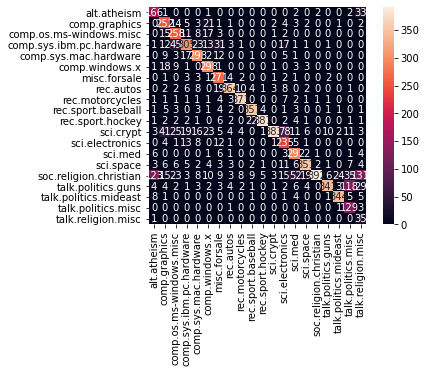

In [5]:
predicted_categories=model.predict(test_data.data)
mat=confusion_matrix(test_data.target,predicted_categories)
sns.heatmap(mat.T,square=True,annot=True,fmt="d",xticklabels=train_data.target_names,yticklabels=train_data.target_names)

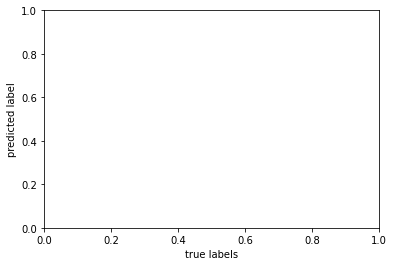

In [6]:
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

In [7]:
print("The accuracy is {}".format(accuracy_score(test_data.target,predicted_categories)))

The accuracy is 0.7738980350504514
